In [119]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')
import scipy

In [120]:
df=pd.read_csv(r'C:\Users\Aditya\Downloads\archive (4)\marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


No need of "unnamed" & "user_id" column 

In [121]:
df.drop(['Unnamed: 0','user id'] ,axis=1 , inplace=True)

In [122]:
df.head(5)

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [123]:
df.shape

(588101, 5)

In [124]:
df.describe()

,total ads,most ads hour
count,588101.000000,588101.000000
mean,24.820876,14.469061
std,43.715181,4.834634
min,1.000000,0.000000
25%,4.000000,11.000000
50%,13.000000,14.000000
75%,27.000000,18.000000
max,2065.000000,23.000000


In [125]:
df1=df[['test group',	'converted',	'total ads',	'most ads day',	'most ads hour']]
df1.nunique()

test group         2
converted          2
total ads        807
most ads day       7
most ads hour     24
dtype: int64

In [126]:
for i in df1.columns:
    print(i.upper(), ":",df1[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
TOTAL ADS : [ 130   93   21  355  276  734  264   17  142  209   47   61   40   20
    9   64   26  248   73  281  389  136   87   46    3  114  175  119
  313   89  364   24  112   49   27  274   45  177   90  265   71   31
  588   56  108  103  239   63   66  111   74   14  258 1057  137  131
  124   13   37  738  199  211   98   19  127   18  126  197   77   60
   95   97   22  117   41   57  593   28   85   53   43  133   33 1328
    7    6   62  247  464   99  233  139  407  323   76  395  166   34
  246  653  122   32  386   44  138  109   39  159   30   59  421  446
  555  105  128  310  163   10  290  164   79  312   16  161  505  640
  118  266  456   80  100  983   36    1    5  463  720   52  442  334
 1056  270  240  194  271  489  115  180  241   15  154  120   29  107
  176    8  146  121   50   69  297   35   78  170  214   81    2   38
  681  733   23  157  153  135   88  167    4   58  195  318   48   83
   96  392  3

In [127]:
df.isnull().sum()

test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

## Univariate Analysis

In [128]:
import os

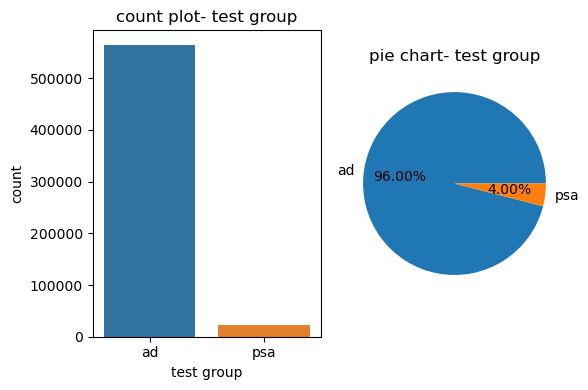

In [129]:
variable='test group'

plt.figure(figsize=(6,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable , data=df1)
plt.title(f'count plot- {variable}')

#pie chart
plt.subplot(1,2,2)
counts=df1[variable].value_counts()
plt.pie(counts , labels=counts.index , autopct='%0.2f%%')
plt.title(f'pie chart- {variable}')

#adjust layout
plt.tight_layout()

plt.show()

Majority of people were shown at "ad" than "psa (general announcement)" 

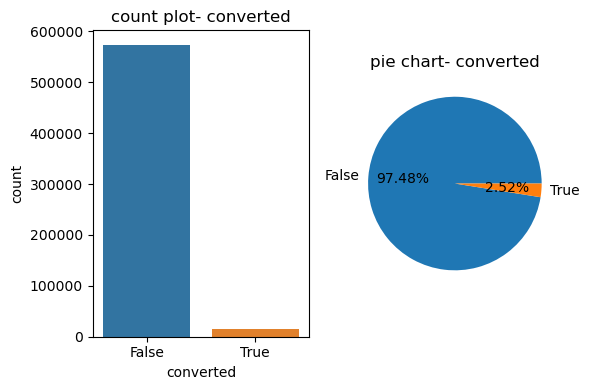

In [130]:
variable='converted'

plt.figure(figsize=(6,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable , data=df1)
plt.title(f'count plot- {variable}')

#pie chart
plt.subplot(1,2,2)
counts=df1[variable].value_counts()
plt.pie(counts , labels=counts.index , autopct='%0.2f%%')
plt.title(f'pie chart- {variable}')

#adjust layout
plt.tight_layout()

plt.show()

Very limited conversion has happened

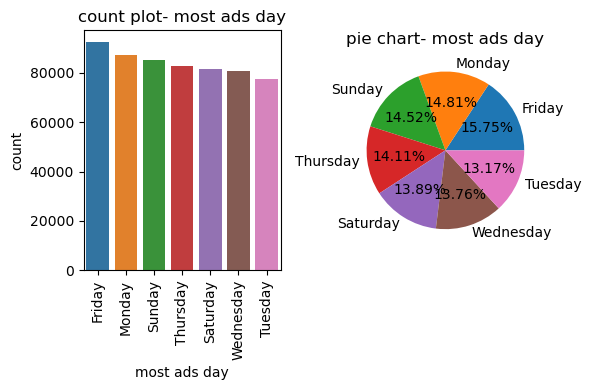

In [131]:
variable='most ads day'

plt.figure(figsize=(6,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable , data=df1 , order=df1[variable].value_counts().index )
plt.title(f'count plot- {variable}')
plt.xticks(rotation=90)

#pie chart
plt.subplot(1,2,2)
counts=df1[variable].value_counts()
plt.pie(counts , labels=counts.index , autopct='%0.2f%%')
plt.title(f'pie chart- {variable}')


#adjust layout
plt.tight_layout()

plt.show()

Maximum ads are shown at friday, followed by monday

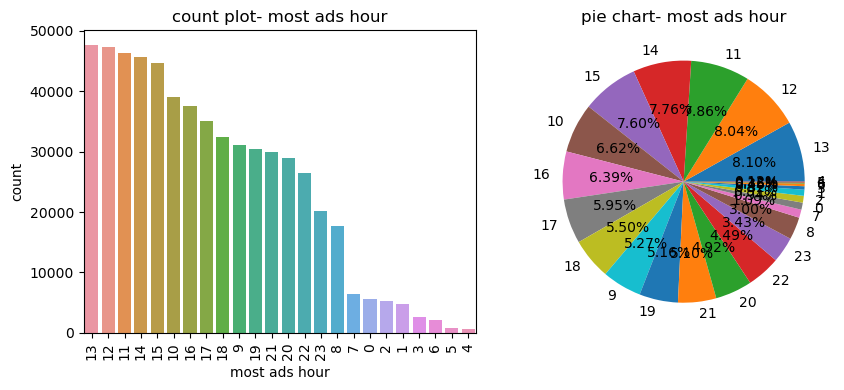

In [132]:
variable='most ads hour'

plt.figure(figsize=(9,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable , data=df1 , order=df1[variable].value_counts().index )
plt.title(f'count plot- {variable}')
plt.xticks(rotation=90)

#pie chart
plt.subplot(1,2,2)
counts=df1[variable].value_counts()
plt.pie(counts , labels=counts.index , autopct='%0.2f%%')
plt.title(f'pie chart- {variable}')


#adjust layout
plt.tight_layout()

plt.show()

Most ads are shown at "1-PM" followed by "12PM"

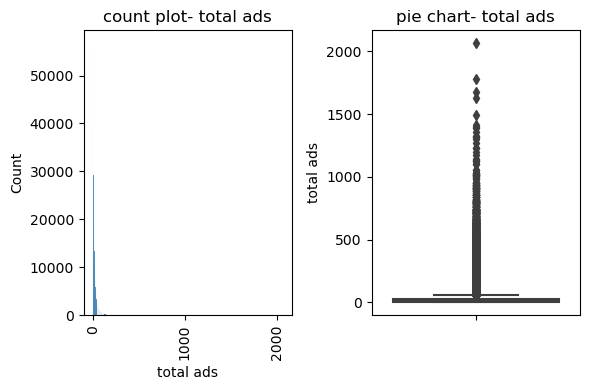

In [133]:
variable='total ads'            #as it is numeric value, lets draw histplot & boxplot

plt.figure(figsize=(6,4))
#histogram
plt.subplot(1,2,1)
sns.histplot(x=variable , data=df1)
plt.title(f'count plot- {variable}')
plt.xticks(rotation=90)

#boxplot
plt.subplot(1,2,2)
sns.boxplot(y=variable , data=df1)
plt.title(f'pie chart- {variable}')


#adjust layout
plt.tight_layout()

plt.show()

In [134]:
df1['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

Lets take the max less than 2065 as 50

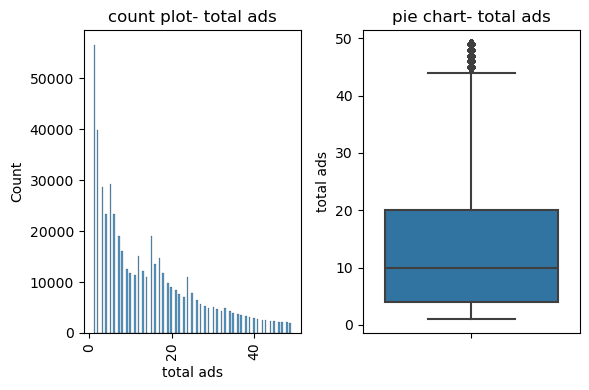

In [135]:
variable='total ads'            #as it is numeric value, lets draw histplot & boxplot

plt.figure(figsize=(6,4))
#histogram
plt.subplot(1,2,1)
sns.histplot(x=variable , data=df1[df1[variable]<50])
plt.title(f'count plot- {variable}')
plt.xticks(rotation=90)

#boxplot
plt.subplot(1,2,2)
sns.boxplot(y=variable , data=df1[df1[variable]<50])
plt.title(f'pie chart- {variable}')


#adjust layout
plt.tight_layout()

plt.show()

## Bivariate analysis

In [136]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [137]:
people_conversion_test_group=pd.crosstab(df['test group'], df['converted'] )
people_conversion_test_group

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [138]:
people_conversion_test_group=pd.crosstab(df['test group'], df['converted'] , normalize='index')
people_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


We can see that "ad" people purchased more than "psa" people

<Axes: xlabel='test group'>

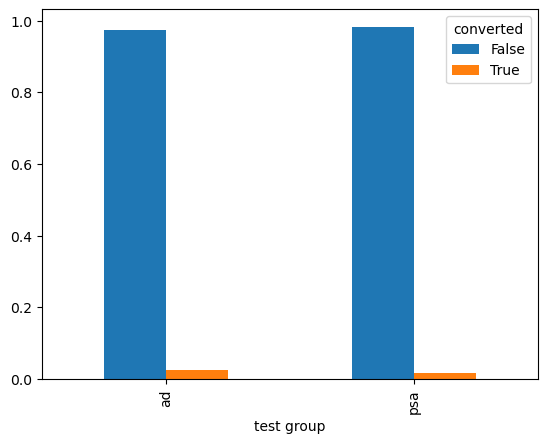

In [139]:
people_conversion_test_group.plot.bar()

<Figure size 1000x400 with 0 Axes>

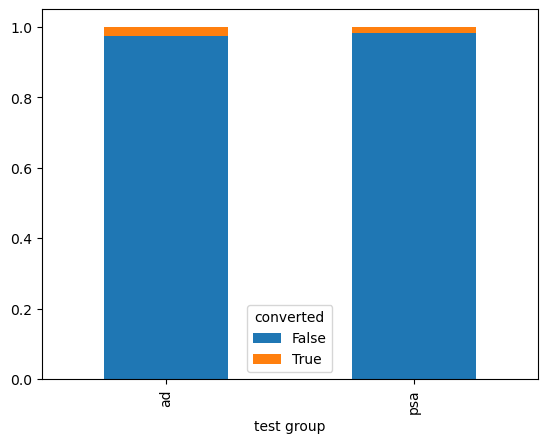

<Figure size 1000x400 with 0 Axes>

In [140]:
people_conversion_test_group.plot.bar(stacked=True)
plt.figure(figsize=(10,4))

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

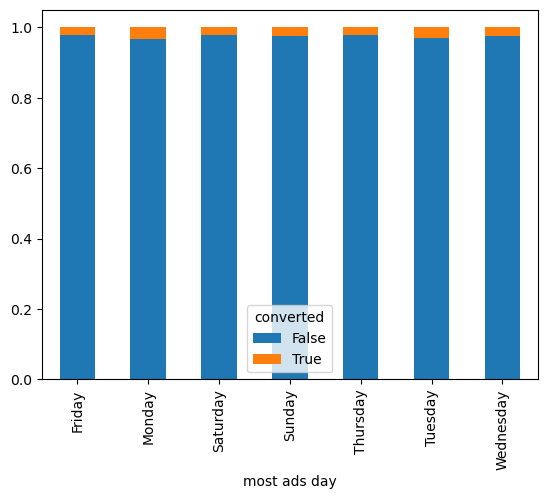

In [141]:
people_conversion_day=pd.crosstab(df['most ads day'], df['converted'] , normalize='index')
print(people_conversion_day.sort_values(by=True, ascending=False))
people_conversion_day.plot.bar(stacked=True)
      

"MONDAY" has the most conversion rate 

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

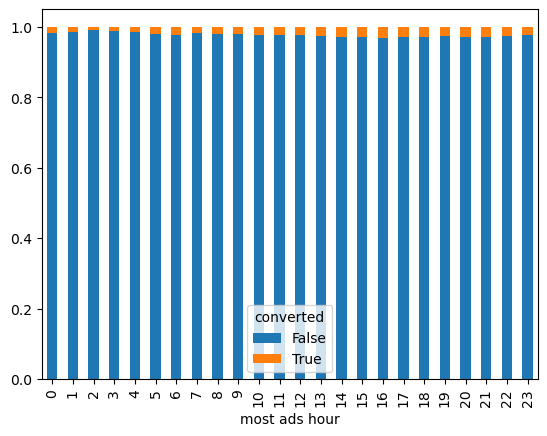

In [142]:
people_conversion_day=pd.crosstab(df['most ads hour'], df['converted'] , normalize='index')
print(people_conversion_day.sort_values(by=True, ascending=False))
people_conversion_day.plot.bar(stacked=True)
      

At "4-PM" Conversion rate is maximum. followed by 8-PM and so on....

So we can tell the company to post the ads around 4 /8 PM

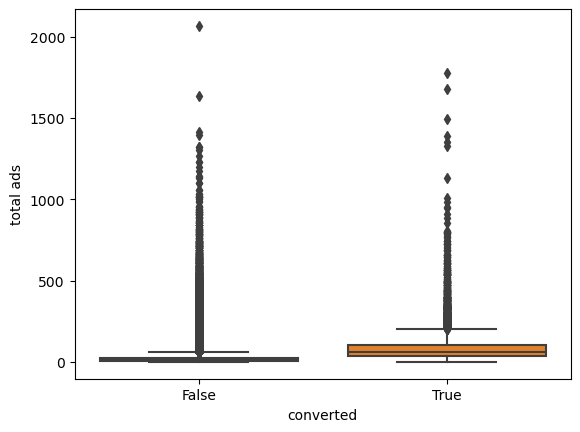

In [143]:
sns.boxplot(x='converted', y='total ads' , data=df);

There is lot of skewness , so lets reduce the ads number for visualization

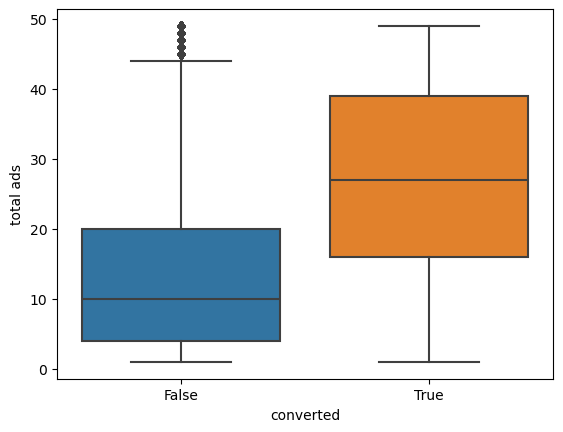

In [144]:
sns.boxplot(x='converted', y='total ads' , data=df[df['total ads']<50]);

We can see that the people who are purchasing , the median amount of ads they are seeing is around "25"

whereas, the people who are not purchasing , the median amount of ads they are seeing is arounf "10"

SO, the conclusion is , show the ads count around "20+"

## Statistical Tests

In [145]:
from scipy.stats import chi2_contingency

p-value: If the p-value from the chi-square test is less than the chosen significance level (e.g., 0.05), you reject the null hypothesis, suggesting that there is a significant difference between the groups.

In [146]:
alpha=0.05        #level of significance
for variable in df1.columns:
     if variable != 'converted':
         #create a contingency table (cross-tabulation)
         contingency_table=pd.crosstab(df1[variable] , df1['converted'])
         

         #perform chi-squared test
         chi2,p,__,_=chi2_contingency(contingency_table)
         
         #Display the results
         print(f'chi-squared test for {variable} vs. converted:')
         print(f'Chi-squared value: {chi2}')
         print(f'p-value:{p}')
         print(f'degrees of freedom:{__}')
         print(f'expected frequency array {_}')

         #check the significance
         if p < alpha:
             print(f'The difference in conversion rates across {variable} is statistically significant')
         else:
             print(f'There is no significant difference is conversion rates acorss {variable}.')
             

chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value:1.9989623063390075e-13
degrees of freedom:1
expected frequency array [[550327.71899045  14249.28100955]
 [ 22930.28100955    593.71899045]]
The difference in conversion rates across test group is statistically significant
chi-squared test for total ads vs. converted:
Chi-squared value: 48001.99019466958
p-value:0.0
degrees of freedom:806
expected frequency array [[5.51773290e+04 1.42867102e+03]
 [3.88218118e+04 1.00518816e+03]
 [2.79376290e+04 7.23371025e+02]
 ...
 [9.74761138e-01 2.52388620e-02]
 [9.74761138e-01 2.52388620e-02]
 [9.74761138e-01 2.52388620e-02]]
The difference in conversion rates across total ads is statistically significant
chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value:1.932184379244731e-85
degrees of freedom:6
expected frequency array [[90270.67946492  2337.32053508]
 [84875.37656627  2197.62343373]
 [79598.99452645  2061.005473

AS WE CAN SEE THAT , THE "P" VALUE IS MUCH SMALLER THAN THE "ALPHA" , SO THERE IS SIGNIFICANT DIFFERENCE BETWEEN THE CONVERSION RATE

## HYPOTHESIS TEST

In [147]:
df1.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')




Lets check the normality of the data

In [148]:
from scipy.stats import shapiro , levene , ttest_ind  , mannwhitneyu

In [149]:
#STEP-1
#NORMALITY ASSUMPTION
shapiro_stat_true,shapiro_p_value_true=shapiro(df[df['converted']==True]['total ads'])    #people who have purchased
shapiro_stat_false,shapiro_p_value_false=shapiro(df[df['converted']==False]['total ads'])  #people who havent purchased

print(f'shapiro-wilk test for normality (True group): p-value = {shapiro_p_value_true}')
print(f'shapiro-wilk test for normality (False group): p-value = {shapiro_p_value_false}')

#Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'] , df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances : p-value = {levene_p_value}")

shapiro-wilk test for normality (True group): p-value = 0.0
shapiro-wilk test for normality (False group): p-value = 0.0
Levene's test for equality of variances : p-value = 0.0


ASSUMPTIONS are not satisfied, none of the data is not normally distributed

At this stage, any one of these test failed , we have to use "Mann-Whitney U" test

In [150]:
#step-2: Perform a suitable test
alpha=0.05

if shapiro_p_value_true>alpha and shapiro_p_value_false>alpha and levene_p_value>alpha:
    #assumption met - use t-test for means
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'] , df[~df['converted']]['total ads'])    
    print(f'Independent two-sample t-test: p-value={t_p_value}')
else:
    #assumption not met - use Mann-Whitney U test for medians
    u_stat, u_p_value= mannwhitneyu(df[df['converted']]['total ads'] , df[~df['converted']]['total ads'])
    print(f'Mann-Whitney U test : p-value = {u_p_value}')
    

Mann-Whitney U test : p-value = 0.0


It does make a difference , of what median amount of total ads they have seen

Practical Implication: 

This result implies that there is a statistically significant difference between the A and B groups in the A/B test. This could mean that one variant (A or B) performs better or worse than the other.

STATISTICALLY CONFIRMED!

--------------------------------------------------------------------------------------------------------------

Mann-Whitney U test:

Unlike the t-test, it does not assume a normal distribution and is suitable for ordinal data or non-normally distributed interval data. This makes it particularly useful for A/B testing when you cannot assume that the data follows a normal distribution or when dealing with outliers.